In [1]:
import re
import fnmatch
from pathlib import Path
from typing import List, Set

In [ ]:
def find_run_numbers(directory: Path, reg_expression: str) -> Set[int]:
    """
    Finds all run numbers in a directory based off of a regular expression.
    Supports only one capture group in the regular expression (this should be the run number!)
    """
    run_numbers = set()
    if not directory.is_dir():
        raise NotADirectoryError(f"Directory not found for: {directory}")
    
    expression = re.compile(reg_expression)
    for file in directory.iterdir():
        if not file.is_file():
            continue

        if match := expression.match(file.name):
            if len(match.groups()) != 1:
                raise ValueError(f"Please provide only one capture group in regular expresion, {len(match.groups())} found. Remember in regex capture groups are denoted by parenthesis ()") 
            run_num_raw = match.group(1)
            if run_num_raw.isdigit():
                run_numbers.add(int(run_num_raw))
            else:
                raise ValueError(f"Your inputted regular expression did not output an integer. Output: {run_num_raw}")
    return run_numbers


binaries = find_run_numbers(
    Path("/home/etl/Test_Stand/ETL_TestingDAQ/Test_Beam_Data/DebugTB/daq/etroc_binaries"),
    r"output_run_(\d+)_rb0.dat"
)

hitmaps = find_run_numbers(
    Path("/home/etl/Test_Stand/ETL_TestingDAQ/Test_Beam_Data/DebugTB/watchdog/etroc_hitmaps"),
    r"output_run_(\d+)_rb0.png"
)

# return all non matching elements 

missing_runs = list(set(binaries)-set(hitmaps))

for run in missing_runs:
    # make hitmaps at location
    ...


38


In [2]:
startup_prompt = """
Please choose one of the following options by inputting 1,2 or 3:
1. Start from last run
2. Custom run start, choosing this will start watchdog from this run number
3. Same as 2, but you can choose a run to stop the watchdog at.                                                               
"""
run_start = None
while not run_start:
    startup_input = input(startup_prompt).strip()
    if startup_input == "1":
        print("Sorry this is not implemented")
    elif startup_input == "2":
        run_start_raw = input("What is your run number?").strip()
        if not run_start_raw.isdigit():
            print(f"Your chosen starting run number is not a number: {run_start_raw}")
        run_start = int(run_start_raw)
    elif startup_input == "3":
        print("Sorry this is not implemented")
    else:
        print(f"Invalid input ({startup_input}), try again")

print(f"Watchdog starting at run: {run_start}")


Invalid input (a), try again
Sorry this is not implemented
Watchdog starting at run: 3


In [21]:
import uproot

root_file = uproot.open("/home/etl/Test_Stand/ETL_TestingDAQ/Test_Beam_Data/DebugTB/watchdog/merged_root/run_11914.root")

In [ ]:
root_file['run_log']

<TObjString '{"config": {"test_beam": {"name": "DESY March 2025", "beam_energy": 120, "project_directory": "/home/etl/Test_Stand/ETL_TestingDAQ"}, "run_config": {"comment": "Temperature -20C at new trigger threshold", "num_runs": 5, "run_log_directory": "/home/etl/Test_Stand/ETL_TestingDAQ/Test_Beam_Data/DebugTB/daq/run_logs"}, "telescope_config": {"kcu_ip_address": "192.168.0.10", "kcu_firmware_version": "abc123", "service_hybrids": [{"telescope_layer": "first", "readout_board_name": "RB0034", "rb": 0, "readout_board_version": "v2.2", "readout_board_config": "modulev1", "module_select": [[110], [], []], "LV_psu": "Siglent SPD3303X_E", "HV_psu": "CAEN HV Power Supply", "bias_voltage": 260.0}], "l1a_delay": 14, "offset": 5, "power_mode": "high", "all_thresholds_directory": "/home/etl/Test_Stand/ETL_TestingDAQ/Test_Beam_Data/DebugTB/daq/thresholds", "reuse_thresholds": false, "etroc_binary_data_directory": "/home/etl/Test_Stand/ETL_TestingDAQ/Test_Beam_Data/DebugTB/daq/etroc_binaries"}, 

In [ ]:
root_file['binary-file-output_run_11914_rb0.dat;1']

<TObjString 'OsspXDwAAQCyAAC6AQACADrLKVw8HgEAsgAAugEeAgB9BCpcPAABAJwAALoBAAIAfQQqXDweAQCcAAC6AR4CAF5KKlw8AAEAzQAAugEAAgBeSipcPB4BAM0AALoBHgIAL4oqXDwAAQDFjGPTnQAAAN8BALoBAAIAL4oqXDweAQB2AAC6AR4CAOPLKlw8AAEAMQAAugEAAgDjyypcPB4BADEAALoBHgIAHwkrXDwAAQBAAAC6AQACAB8JK1w8HgEAQAAAugEeAgAYRytcPAABAMiwE4abAAAAYAEAugEAAgAYRytcPB4BAGYAALoBHgIA8YgrXDwAAQCoAAC6AQACAPGIK1w8HgEAqAAAugEeAgC6wCtcPAABAMbAwNSbAAAAxKBA9ZsAAADEWIjUnQAAAE0DALoBAAIAusArXDweAQBdAAC6AR4CACQJLFw8AAEAzbwyApkAAADO6NPBmgAAAM4MlMGcAAAAxuADop8AAAD6BAC6AQACACQJLFw8HgEAtQAAugEeAgCxRyxcPAABABUAALoBAAIAsUcsXDweAQAVAAC6AR4CAJmILFw8AAEASQAAugEAAgCZiCxcPB4BAEkAALoBHgIAY8UsXDwAAQBUAAC6AQACAGPFLFw8HgEAVAAAugEeAgArBy1cPAABAKEAALoBAAIAKwctXDweAQChAAC6AR4CAGpHLVw8AAEAJAAAugEAAgBqRy1cPB4BACQAALoBHgIAaIYtXDwAAQBCAAC6AQACAGiGLVw8HgEAzJgAlIceAAAEAQC6AR4CAJfDLVw8AAEAyex6Y5sAAAB2AQC6AQACAJfDLVw8HgEA5gAAugEeAgACBi5cPAABAA0AALoBAAIAAgYuXDweAQANAAC6AR4CAApILlw8AAEA4gAAugEAAgAKSC5cPB4BAOIAALoBHgIAAIMuXDwAAQApAAC6AQACAACDLlw8HgEAKQAAugEeAgDowC5cPAABALEAALo

In [25]:
import base64
file_bytes = base64.b64decode(
    root_file['binary-file-output_run_11914_rb0.dat;1'])

In [27]:
with open('temp.dat', 'wb') as f:
    f.write(file_bytes)

In [35]:
import sys
sys.path.append('..')
from processing.etroc_binary_decoder import converter, root_dumper
from processing.lecroy_binary_decoder import LecroyReader


In [ ]:
etroc_unpacked_data = converter(['/home/etl/Test_Stand/ETL_TestingDAQ/notebooks/temp.dat'], skip_trigger_check=True)
etroc_data = root_dumper(etroc_unpacked_data) # root dumper name is due to history 
etroc_data

In [38]:
file_bytes = base64.b64decode(
    root_file['binary-file-C3--Trace11914.trc;1'])
with open('chnl3.dat', 'wb') as f:
    f.write(file_bytes)


In [39]:
chnl2 = LecroyReader("/home/etl/Test_Stand/ETL_TestingDAQ/notebooks/chnl3.dat")

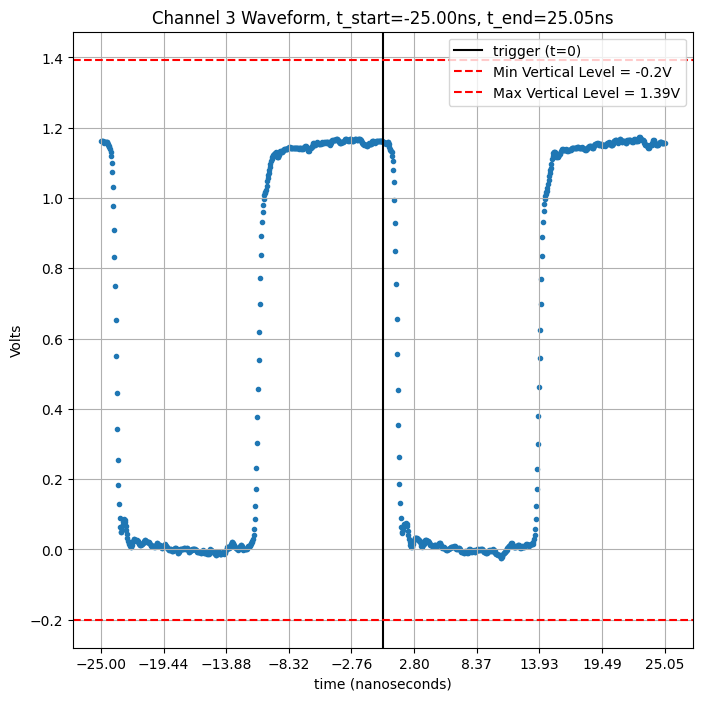

In [40]:
chnl2.plot_event(5)